<a href="https://colab.research.google.com/github/aryanpatil1503/Machine-Learning-Project1/blob/master/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams["figure.figsize"]=(10,5)






In [ ]:
from google.colab import files
uploaded=files.upload()


Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (3).csv


In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv']))

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
df.isnull

<bound method DataFrame.isnull of         ID  Age  Experience  ...  CD Account  Online  CreditCard
0        1   25           1  ...           0       0           0
1        2   45          19  ...           0       0           0
2        3   39          15  ...           0       0           0
3        4   35           9  ...           0       0           0
4        5   35           8  ...           0       0           1
...    ...  ...         ...  ...         ...     ...         ...
4995  4996   29           3  ...           0       1           0
4996  4997   30           4  ...           0       1           0
4997  4998   63          39  ...           0       0           0
4998  4999   65          40  ...           0       1           0
4999  5000   28           4  ...           0       1           1

[5000 rows x 14 columns]>

In [ ]:
experience=df['Experience']
age=df['Age']
correlation=experience.corr(age)
correlation

0.9942148569683321

In [ ]:
df=df.drop(['ID','Experience'],axis=1)
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
duplicate_rows=df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Age, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


In [ ]:
df=df.dropna()
df.count()

Age                   5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [ ]:
df.isnull

<bound method DataFrame.isnull of       Age  Income  ZIP Code  ...  CD Account  Online  CreditCard
0      25      49     91107  ...           0       0           0
1      45      34     90089  ...           0       0           0
2      39      11     94720  ...           0       0           0
3      35     100     94112  ...           0       0           0
4      35      45     91330  ...           0       0           1
...   ...     ...       ...  ...         ...     ...         ...
4995   29      40     92697  ...           0       1           0
4996   30      15     92037  ...           0       1           0
4997   63      24     93023  ...           0       0           0
4998   65      49     90034  ...           0       1           0
4999   28      83     92612  ...           0       1           1

[5000 rows x 12 columns]>

## **EDA**

In [ ]:
#number of unique data in each column
df.nunique()


Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [ ]:
#as ZIP Code is a nominal data i.e doesnot make a lot of sense in order
#even after one hot encoding it would lead to multicollinearity and hence we drop the data of ZIP Code 
df.drop('ZIP Code',axis=1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [ ]:
#to find number of people with 0 mortgage
(df.Mortgage==0).sum()
## there are 3462 people out of 5000 who have 0 mortgage

3462

In [ ]:
# to find number of people with 0 credit card spending per month
(df.CCAvg==0).sum()
#there are 106 people who have 0 credit card spending per month

106

In [ ]:
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
  df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Age                     20.0
Income                  59.0
ZIP Code              2697.0
Family                   2.0
CCAvg                    1.8
Education                2.0
Mortgage               101.0
Personal Loan            0.0
Securities Account       0.0
CD Account               0.0
Online                   1.0
CreditCard               1.0
dtype: float64


## Univariate Analysis

In [ ]:
df.mean()

Age                      45.338400
Income                   73.774200
ZIP Code              93152.503000
Family                    2.396400
CCAvg                     1.937938
Education                 1.881000
Mortgage                 56.498800
Personal Loan             0.096000
Securities Account        0.104400
CD Account                0.060400
Online                    0.596800
CreditCard                0.294000
dtype: float64

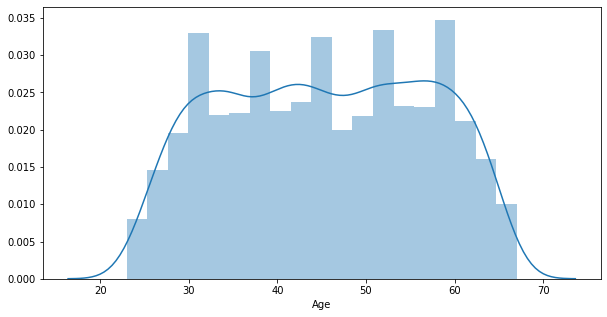

In [ ]:
sns.distplot(df["Age"])
#Age has approximately symmetric distribution

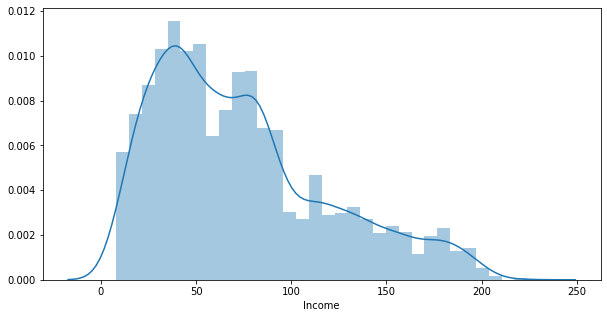

In [ ]:
sns.distplot(df["Income"])
#right skewed distribution of data

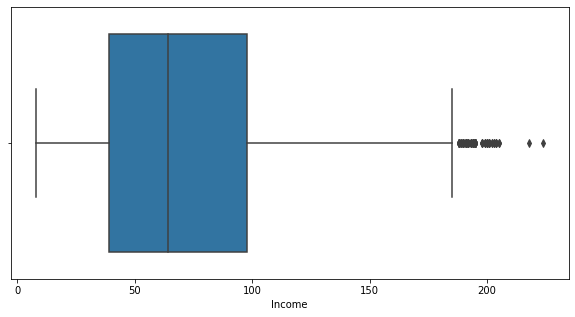

In [ ]:
sns.boxplot(df['Income'])
#just to get a better idea of outliers

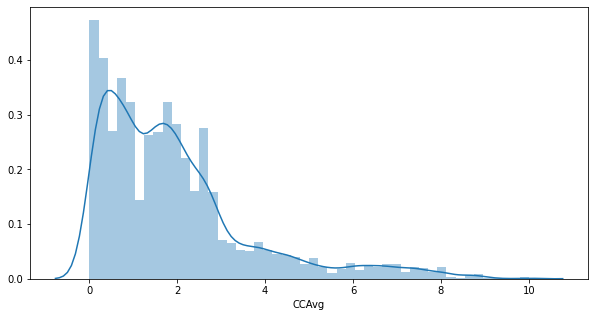

In [ ]:
sns.distplot(df['CCAvg'])

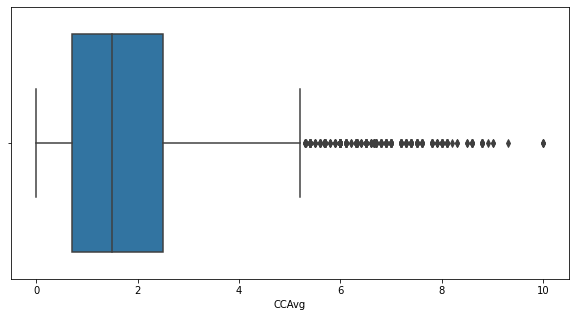

In [ ]:
sns.boxplot(df['CCAvg'])

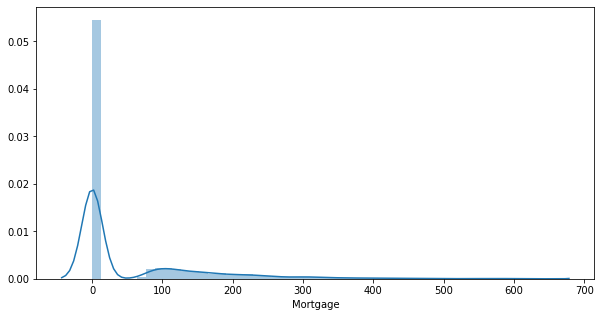

In [ ]:
sns.distplot(df["Mortgage"])

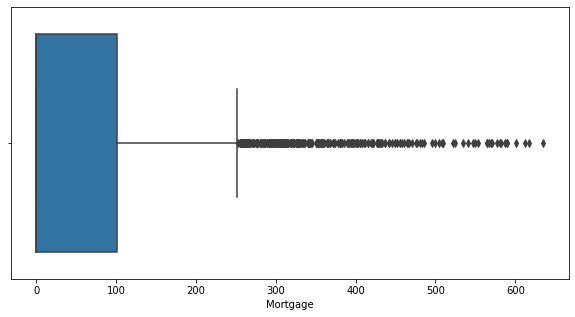

In [ ]:
sns.boxplot(df['Mortgage'])

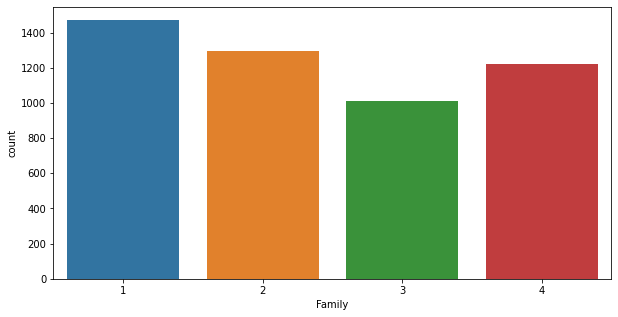

In [ ]:
sns.countplot(df['Family'])

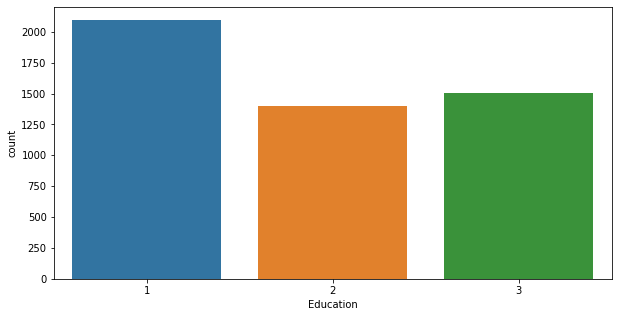

In [ ]:
sns.countplot(df['Education'])

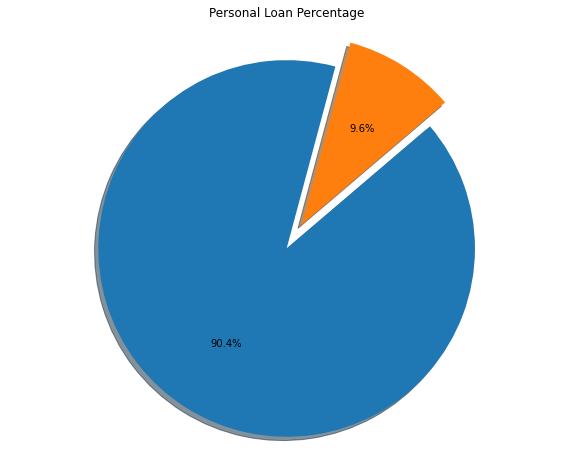

In [ ]:
tempDF=pd.DataFrame(df['Personal Loan'].value_counts()).reset_index()
tempDF.columns=["Labels","Personal Loan"]
fig1, ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(tempDF["Personal Loan"], explode=explode, autopct='%1.1f%%', shadow=True,startangle=75)
ax1.axis('equal')      ##equal aspect ratio makes sure that the pie is drawn a circle
plt.title("Personal Loan Percentage")
plt.show()

## Multivariate Analysis# New section

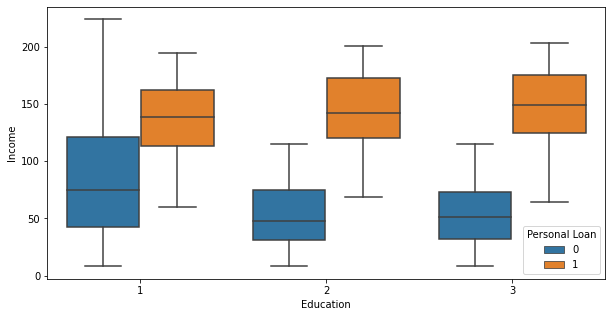

In [ ]:
#The graph shows that customers with more income are granted loan accross every education level
sns.boxplot(x=df['Education'],y=df["Income"],hue=df["Personal Loan"])

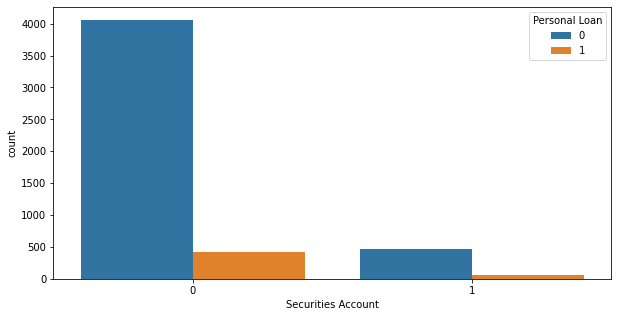

In [ ]:
#Majority of people having security account dont have personal loans
sns.countplot(x=df["Securities Account"],hue=df['Personal Loan'])

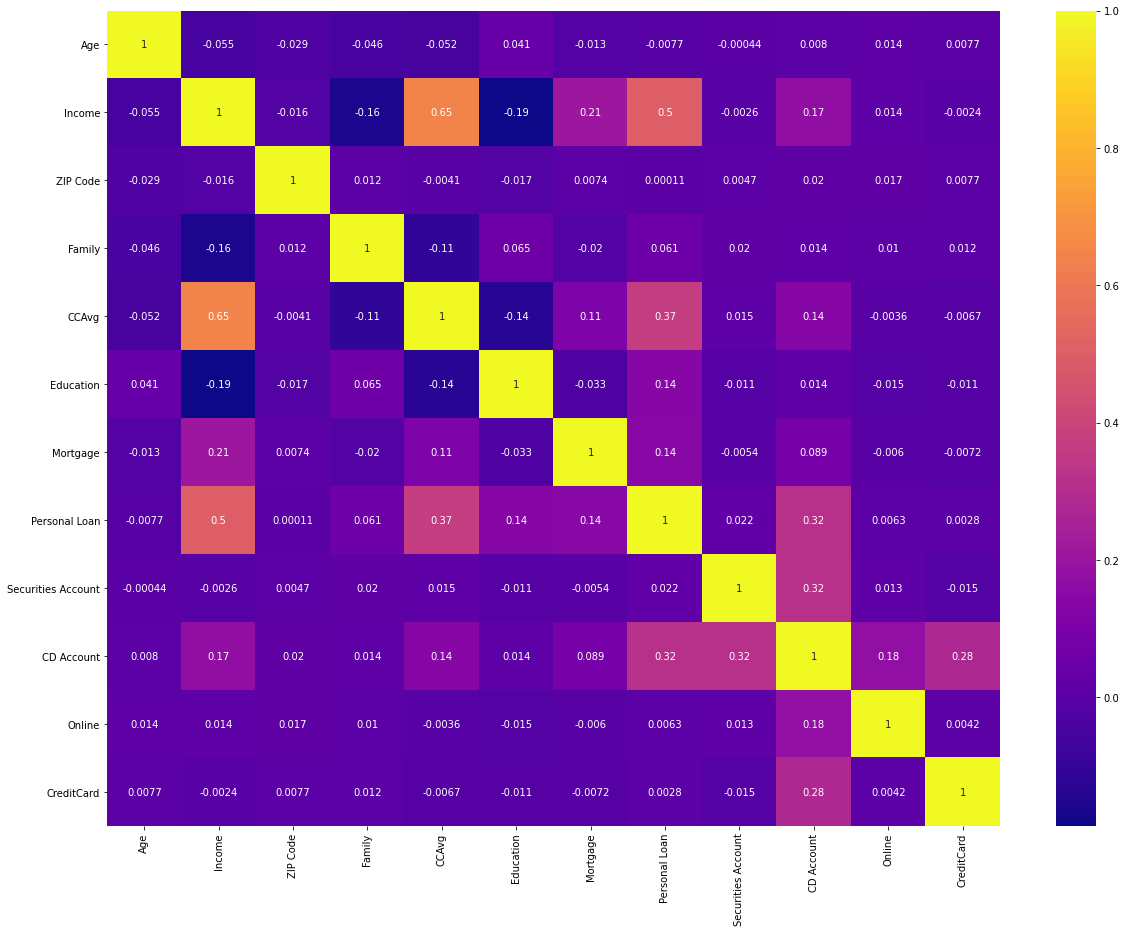

In [ ]:
##after dropping Experience column earlier doesnt seem to be significantly corellated with
#other variables except income and credit card average
fig,ax=plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),cmap="plasma",annot=True) 

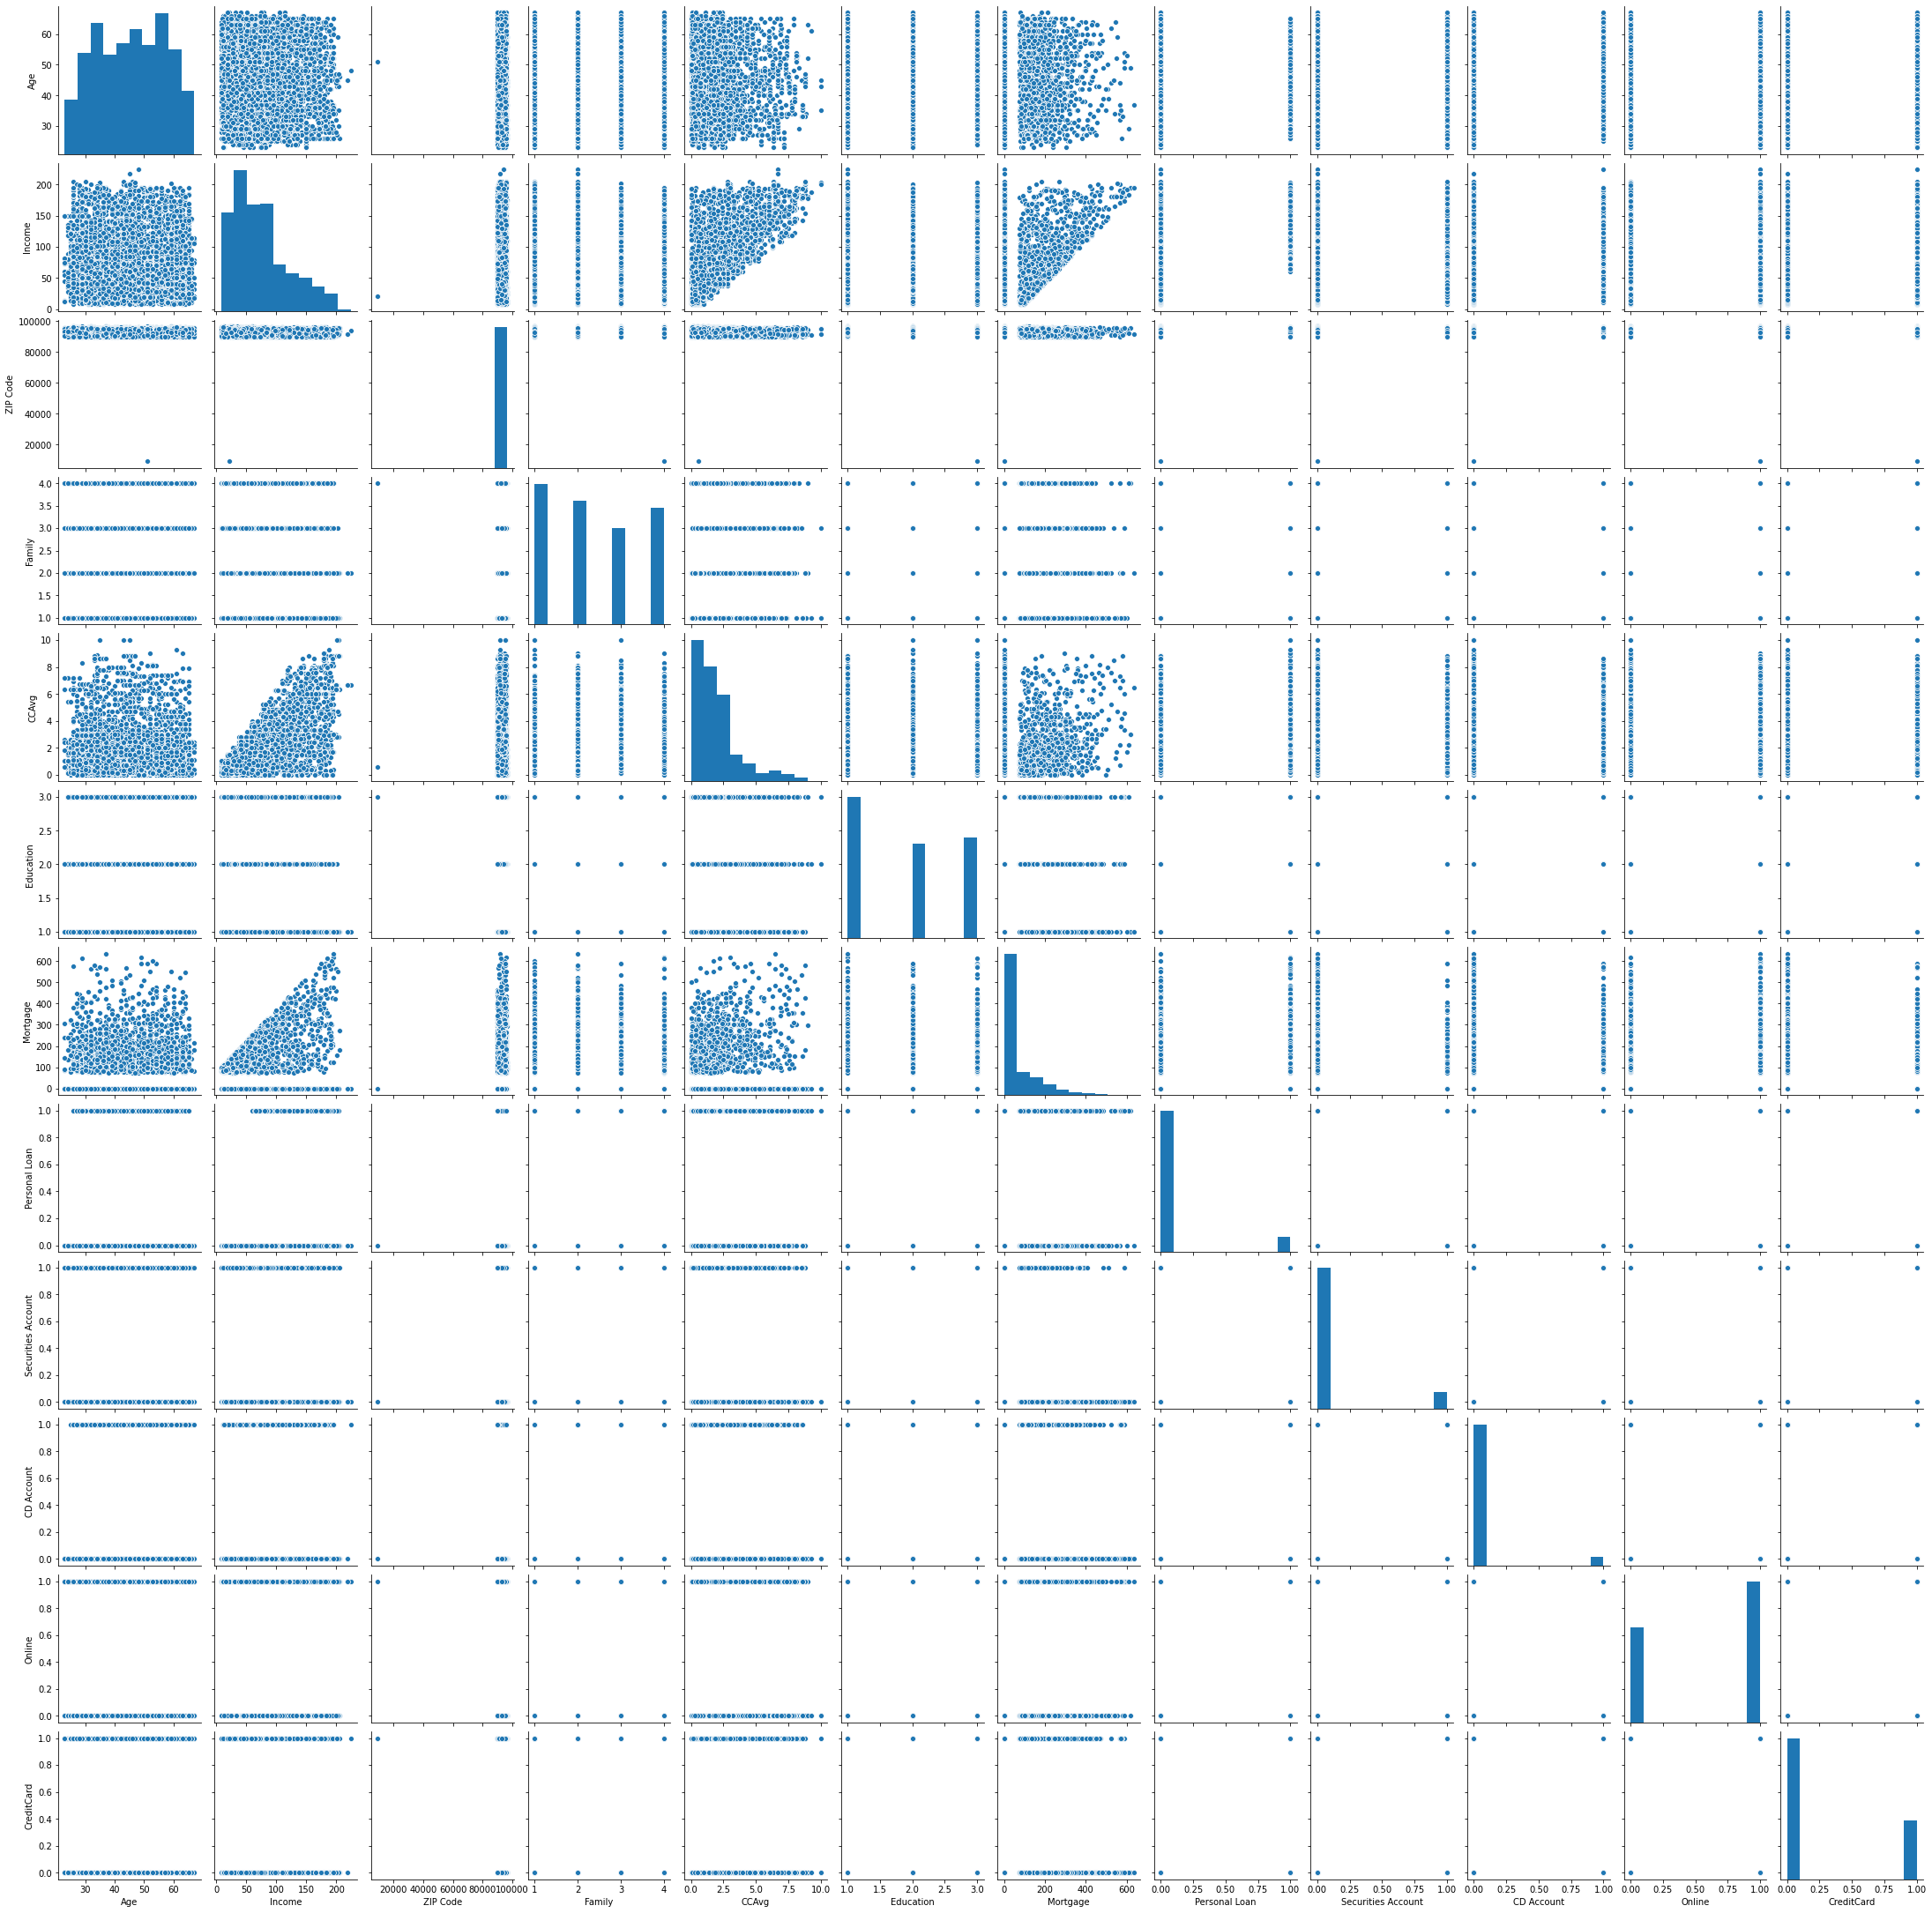

In [ ]:
sns.pairplot(df)

In [ ]:
##following steps are for data allocation as Feature variables and Target variable
features=['Age','Income','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']
data_X=df[features]                #data_X is the feature variables which will help to to predict "Personal Loan"
data_Y=df[['Personal Loan']].values #data_Y is the Target variable to be found
data_Y


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

## Transformation of feature variables (data preprocessing)

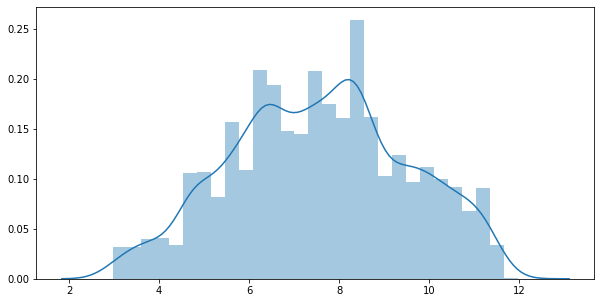

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(data_X["Income"].values.reshape(-1,1))
temp=pt.transform(data_X["Income"].values.reshape(-1,1))
sns.distplot(temp)

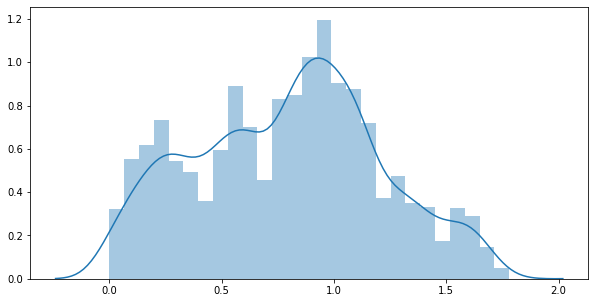

In [ ]:
pt=PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(data_X["CCAvg"].values.reshape(-1,1))
temp=pt.transform(data_X["CCAvg"].values.reshape(-1,1))
sns.distplot(temp)

In [ ]:
data_X["Mortgage_Int"]=pd.cut(data_X["Mortgage"],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
data_X.drop("Mortgage",axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']

for column in columns_to_scale:
    scaler = MinMaxScaler()
    df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))

## Splitting the Data 

We use Stratified sampling method here as we observed in the univariate analysis that only 9.6% of people are approved for loans 
Hence for uniformity of splitting of data in test and training dataset we use Stratified Sampling

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(data_X,data_Y,test_size=0.3, stratify=data_Y, random_state=0)
train_Y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
train_X.head()

,Age,Income,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
3789,51,24,0.4,1,0,0,1,1,0
758,64,35,1.5,2,1,0,0,0,0
2868,52,31,1.8,1,0,0,1,1,0
2550,32,20,0.5,3,0,0,1,0,1
2150,62,54,0.8,1,1,0,0,1,0


In [ ]:
class_names = ['wont take loan', 'take loan']

In [ ]:
train_Y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

## Classifiers

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve


In [ ]:
##training classifiers
classifier_1=LogisticRegression(random_state=0,max_iter=500)
classifier_2=DecisionTreeClassifier(random_state=0,max_depth=8)
classifier_3=RandomForestClassifier(n_estimators=500,max_depth=8,n_jobs=-1)


training accuracy using Logistic Regression:0.9477
training accuracy using Logistic Regression:0.9513
Precision:  0.82
recall:  0.63


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

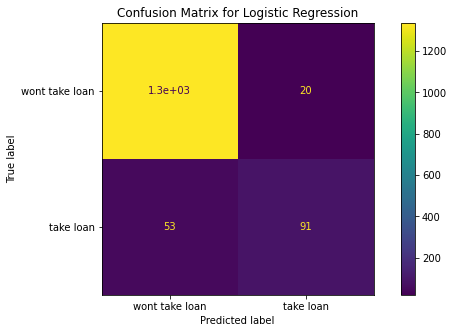

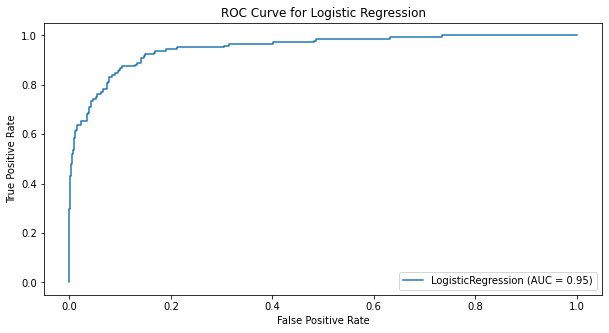

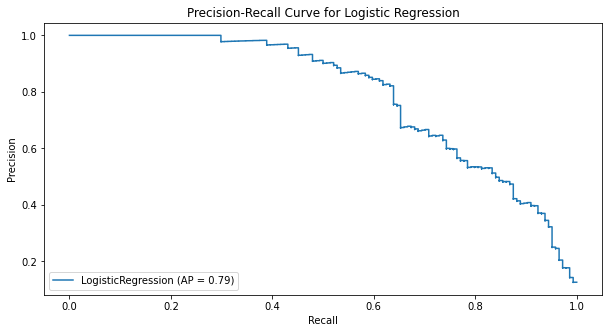

In [ ]:
##Using Logistic Regression
classifier_1.fit(train_X,train_Y.ravel())
pred_1_test_X=classifier_1.predict(test_X)
pred_1_train_X=classifier_1.predict(train_X)
accuracy_1_test_Y=accuracy_score(test_Y,pred_1_test_X)
accuracy_1_train_Y=accuracy_score(train_Y,pred_1_train_X)
print("training accuracy using Logistic Regression:{:.4f}".format(accuracy_1_train_Y))
print("training accuracy using Logistic Regression:{:.4f}".format(accuracy_1_test_Y))
precision_log=precision_score(test_Y,pred_1_test_X, labels=class_names).round(2)
print("Precision: ",precision_log)
recall_log=recall_score(test_Y,pred_1_test_X).round(2)
print("recall: ",recall_log)
plot_confusion_matrix(classifier_1, test_X, test_Y, display_labels=class_names)
plt.title('Confusion Matrix for Logistic Regression')
plot_roc_curve(classifier_1, test_X, test_Y)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(classifier_1, test_X, test_Y)
plt.title('Precision-Recall Curve for Logistic Regression')



training accuracy using Decision Tree Classifier:0.9477
training accuracy using Decision Tree Classifier:0.9513
Precision:  0.84
recall:  0.78


Text(0.5, 1.0, 'Precision-Recall Curve Decision Tree Classifiern')

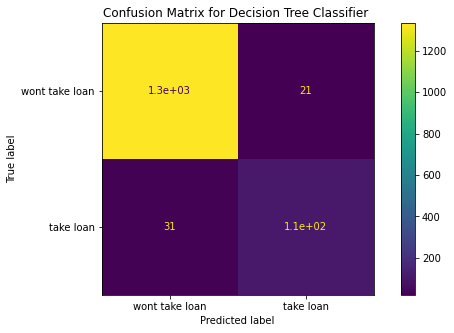

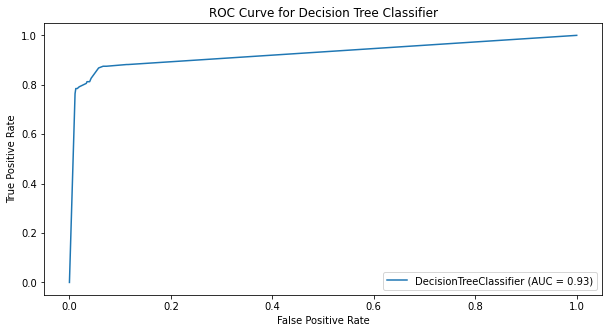

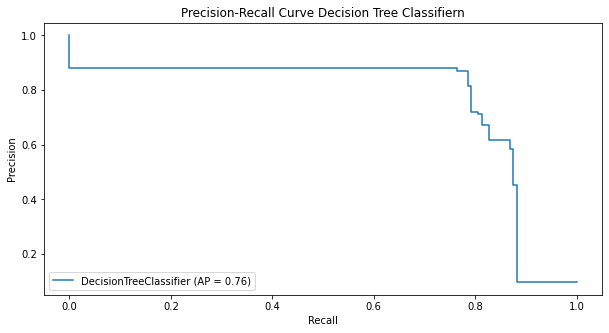

In [ ]:
##Using Decision Tree Classifier
classifier_2.fit(train_X,train_Y.ravel())
pred_2_test_X=classifier_2.predict(test_X)
pred_2_train_X=classifier_2.predict(train_X)
accuracy_2_test_X=accuracy_score(test_Y,pred_1_test_X)
accuracy_2_train_X=accuracy_score(train_Y,pred_1_train_X)
print("training accuracy using Decision Tree Classifier:{:.4f}".format(accuracy_2_train_X))
print("training accuracy using Decision Tree Classifier:{:.4f}".format(accuracy_2_test_X))
precision_decisiontree=precision_score(test_Y,pred_2_test_X, labels=class_names).round(2)
print("Precision: ",precision_decisiontree)
recall_decisiontree=recall_score(test_Y,pred_2_test_X).round(2)
print("recall: ",recall_decisiontree)
plot_confusion_matrix(classifier_2, test_X, test_Y, display_labels=class_names)
plt.title('Confusion Matrix for Decision Tree Classifier ')
plot_roc_curve(classifier_2, test_X, test_Y)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(classifier_2, test_X, test_Y)
plt.title('Precision-Recall Curve Decision Tree Classifiern')

training accuracy using Random Forest Classifier:0.9477
training accuracy using Random Forest Classifier:0.9513
Precision:  0.93
recall:  0.78


Text(0.5, 1.0, 'Precision-Recall Curve Random Forest Classifier')

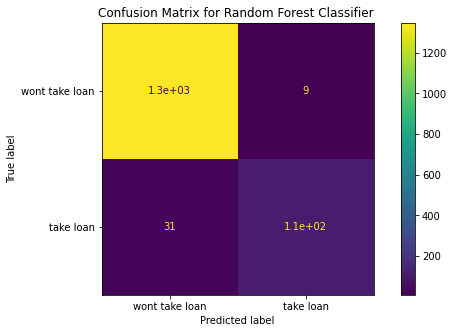

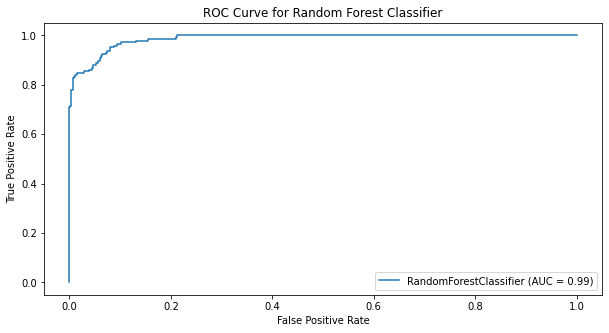

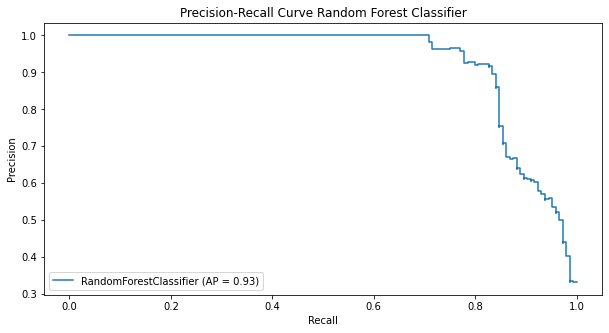

In [ ]:
##Using Random Forest Classifier
classifier_3.fit(train_X,train_Y.ravel())
pred_3_test_X=classifier_3.predict(test_X)
pred_3_train_X=classifier_3.predict(train_X)
accuracy_3_test_X=accuracy_score(test_Y,pred_1_test_X)
accuracy_3_train_X=accuracy_score(train_Y,pred_1_train_X)
print("training accuracy using Random Forest Classifier:{:.4f}".format(accuracy_2_train_X))
print("training accuracy using Random Forest Classifier:{:.4f}".format(accuracy_2_test_X))
precision_randomforest=precision_score(test_Y,pred_3_test_X, labels=class_names).round(2)
print("Precision: ",precision_randomforest)
recall_randomforest=recall_score(test_Y,pred_3_test_X).round(2)
print("recall: ",recall_randomforest)
plot_confusion_matrix(classifier_3, test_X, test_Y, display_labels=class_names)
plt.title('Confusion Matrix for Random Forest Classifier ')
plot_roc_curve(classifier_3, test_X, test_Y)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(classifier_3, test_X, test_Y)
plt.title('Precision-Recall Curve Random Forest Classifier')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9506666666666667
training accuracy using Support Vector Machine:0.9511
training accuracy using Support Vector Machine:0.9507
Precision:  0.85
recall:  0.59


Text(0.5, 1.0, 'Precision-Recall Curve Support Vector Machine')

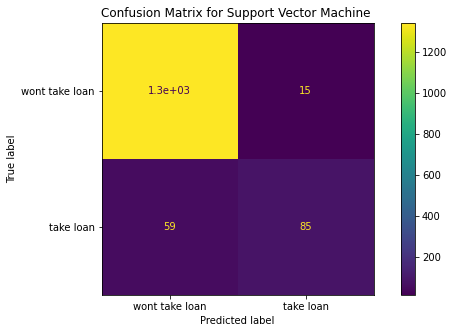

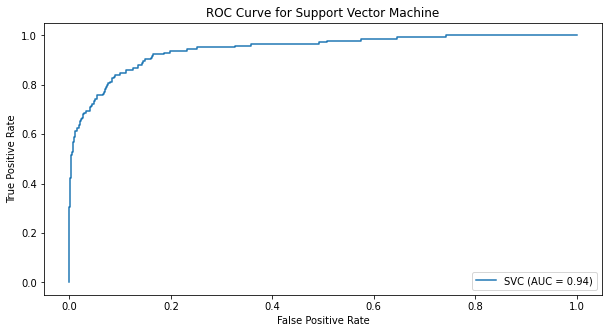

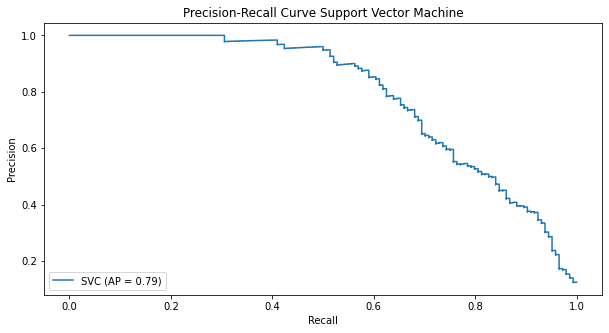

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(train_X, train_Y)

#Predict the response for test dataset
y_pred = clf.predict(test_X)

pred_4_test_X=clf.predict(test_X)
pred_4_train_X=clf.predict(train_X)
accuracy_4_test_X=accuracy_score(test_Y,pred_4_test_X)
accuracy_4_train_X=accuracy_score(train_Y,pred_4_train_X)
print("training accuracy using Support Vector Machine:{:.4f}".format(accuracy_4_train_X))
print("training accuracy using Support Vector Machine:{:.4f}".format(accuracy_4_test_X))
precision_svm=precision_score(test_Y,pred_4_test_X, labels=class_names).round(2)
print("Precision: ",precision_svm)
recall_svm=recall_score(test_Y,pred_4_test_X).round(2)
print("recall: ",recall_svm)
plot_confusion_matrix(clf, test_X, test_Y, display_labels=class_names)
plt.title('Confusion Matrix for Support Vector Machine ')
plot_roc_curve(clf, test_X, test_Y)
plt.title('ROC Curve for Support Vector Machine')

plot_precision_recall_curve(clf, test_X, test_Y)
plt.title('Precision-Recall Curve Support Vector Machine')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)
model.fit(train_X,train_Y)
y_pred=model.predict(test_X)
accuracy_5_test_X=accuracy_score(test_Y,y_pred)
print(accuracy_5_test_X)

0.9166666666666666


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
